# Criando a base de dados para treinamento e validação a partir da base de imagens

Esse programa tem como objetivo extrair as features, criar o dataset com com elas (X,y) e salvar na memória para ser usado nos demais programas (treinamento e testes).


In [1]:
import cv2
import dlib
import numpy as np
import os,glob

import myUtils
from myUtils import facial_landmarks_idxs as facial_pts_idxs

import matplotlib.pyplot as plt

In [2]:
# identificador dos landmarks
predictor = dlib.shape_predictor("../shape_predictor_68_face_landmarks.dat")

In [3]:
ORIG_DATASET_DIR = "../dataset_B_Facial_Images/"
ORIG_CLOSED_DIR  = "../dataset_B_Facial_Images/ClosedFace/"
ORIG_OPENED_DIR  = "../dataset_B_Facial_Images/OpenFace/"

In [4]:
# Criando diretório
try:
    os.mkdir("dataset")
except:
    os.rmdir("dataset")
    os.mkdir("dataset")
    pass

In [5]:
#load dataset original
faces_closed = []
faces_opened = []

#carregar imagens de "faces fechadas"
for file in glob.glob(os.path.join(ORIG_CLOSED_DIR, "*.jpg")):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = cv2.GaussianBlur(img, ksize=(3,3), sigmaX=0) #leve suavização na imagem
    faces_closed.append(img)

#Carregar images de "faces abertas"
for file in glob.glob(os.path.join(ORIG_OPENED_DIR, "*.jpg")):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = cv2.GaussianBlur(img, ksize=(3,3), sigmaX=0) #leve suavização na imagem
    faces_opened.append(img)

In [6]:
# # Extratores de caracteristicas
# def ear_feature_extrator(image, landmarks):
#     #pega apenas os 6 pontos que representam a regiao de interesse
#     #pontos do olho esquerdo
#     left_eye_pts  = landmarks[facial_landmarks_idxs['left_eye'],:]
#     #pontos do olho direito
#     right_eye_pts = landmarks[facial_landmarks_idxs['right_eye'],:]
    
#     ear_l = myUtils.eye_aspect_ratio(left_eye_pts)
#     ear_r = myUtils.eye_aspect_ratio(right_eye_pts)
    
#     return ear_l, ear_r

# def hist_feature_extrator(image, landmarks):
#     #segmenta a imagem
#     segmented, _ = myUtils.eyes_segmentation(image, landmarks)
    
#     #quantidade de bins testado empiricamente, 8~10 aparentou ser um bom número
#     bins = 8
#     ranges= [1,255]#começa em 1 para ignorar os zeros da imagem (imagem vira segmentada)

#     hist = cv2.calcHist([segmented], channels=[0], mask = None, histSize=[bins], ranges=ranges)
#     #normaliza os valores do histograma para [0,1]
#     cv2.normalize(hist,hist)
    
#     return hist.flatten().tolist()

# def feature_extrator():
#     pass

In [7]:
def crop_eyes_region():
    pass

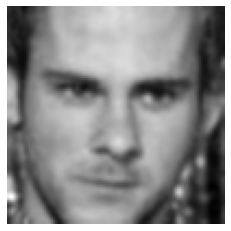

In [8]:
faces = faces_closed + faces_opened
faces = faces_opened
rand_idx = np.random.randint(len(faces))
rand_img = faces[rand_idx]


plt.imshow(rand_img,cmap='gray')
plt.axis('off')
plt.show()

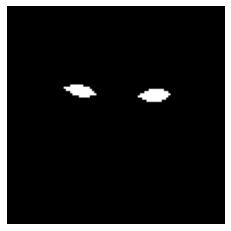

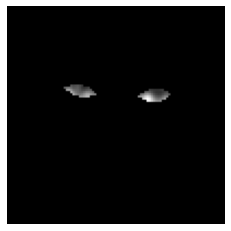

In [9]:
landmarks = myUtils.get_landmarks(rand_img, predictor)
segmented, mask = myUtils.eyes_segmentation(rand_img, landmarks)

plt.imshow(mask, 'gray')
plt.axis('off')
plt.show()

plt.imshow(segmented, 'gray')
plt.axis('off')
plt.show()

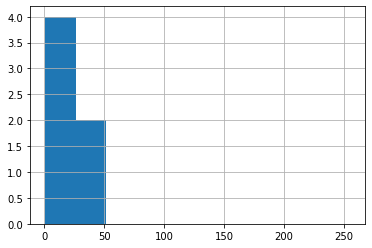

In [10]:
bins = 10
ranges= [1,255]

hist = cv2.calcHist([segmented], channels=[0], mask = None, histSize=[bins], ranges=ranges)
plt.hist(hist, bins=bins, range=ranges)
plt.grid()
plt.show()

In [11]:
hist

array([[ 0.],
       [32.],
       [40.],
       [25.],
       [14.],
       [ 7.],
       [ 3.],
       [ 0.],
       [ 0.],
       [ 0.]], dtype=float32)

In [13]:
myUtils.feature_extrator_EAR(rand_img, landmarks)

[0.30015885596807385, 0.35623524993954825]

In [14]:
myUtils.feature_extrator_HIST(rand_img, landmarks)

[0.09178777039051056,
 0.7037062048912048,
 0.6425144076347351,
 0.26006534695625305,
 0.12238369137048721,
 0.030595922842621803,
 0.0,
 0.0]

In [15]:
myUtils.feature_extrator_EAR_HIST(rand_img, landmarks)

[0.30015885596807385,
 0.35623524993954825,
 0.09178777039051056,
 0.7037062048912048,
 0.6425144076347351,
 0.26006534695625305,
 0.12238369137048721,
 0.030595922842621803,
 0.0,
 0.0]